In [35]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

%store -r df_US_pivot


In [36]:
df_US_softwear_pivot = pd.read_csv(r"C:\Users\Shah Alam\Downloads\job_postings.csv", index_col="job_posted_month")
df_US_softwear_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [38]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [44]:
df_US_merged = df_US_pivot.merge(df_US_softwear_pivot, on='job_posted_month')

In [54]:
top_5 = (df_US_merged
         .sum() 
         .sort_values(ascending=False)
         .head(5) 
         .index 
         .tolist()
         )
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

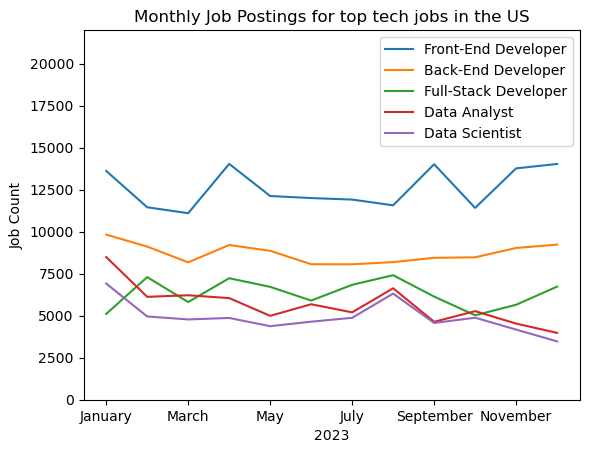

In [62]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for top tech jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 22000)
plt.legend()
plt.show()